In [22]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [23]:
import torch
from configuration import conf
from utils.data_loader import load_mnist
from models.base import Linear_base_model, Convolutional_base_model
from utils.visualise import *
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import pandas as pd

trainloader, testloader = load_mnist()

NUM_DISTR = '5'
LAYER_TYPE = 'DE'
conf.num_distr = NUM_DISTR
conf.layer_type = LAYER_TYPE

if conf.model_type == 'CNN':
    model = Convolutional_base_model()
elif conf.model_type == 'NN':
    model = Linear_base_model()




model.load_state_dict(torch.load('./ckp/num_distr={}/NN/mnist_{}.pt'.format(NUM_DISTR, LAYER_TYPE)))



<All keys matched successfully>

In [24]:
indices, classes = model.get_distr_index(testloader)

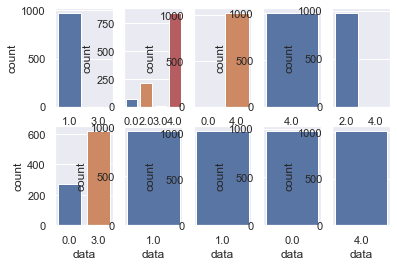

In [25]:
f, axes = plt.subplots(2, 5)
for cls in np.arange(10):
    x = indices[classes==cls]
    x = np.stack([x,np.ones(x.shape[0])*cls],1)
    df = pd.DataFrame(data=x, columns=['data','label'])
    idx_y = cls if cls < 5 else cls-5
    idx_x = 0 if cls < 5 else 1
    sns.countplot(x='data',data=df, ax=axes[idx_x,idx_y])

In [26]:
for cls in np.arange(10):
    x = indices[classes==cls]
    print('Class %d'%cls)
    print(np.mean(x), np.std(x))
    print(np.unique(x,return_counts=True))
    print('--'*50)

Class 0
1.0040816326530613 0.09025854852039175
(array([1, 3]), array([978,   2]))
----------------------------------------------------------------------------------------------------
Class 1
3.3744493392070485 1.1632625511259211
(array([0, 2, 3, 4]), array([ 71, 209,   8, 847]))
----------------------------------------------------------------------------------------------------
Class 2
3.992248062015504 0.17591946849473203
(array([0, 4]), array([   2, 1030]))
----------------------------------------------------------------------------------------------------
Class 3
4.0 0.0
(array([4]), array([1010]))
----------------------------------------------------------------------------------------------------
Class 4
2.0020366598778003 0.06379006013590968
(array([2, 4]), array([981,   1]))
----------------------------------------------------------------------------------------------------
Class 5
2.0818385650224216 1.382557009404187
(array([0, 3]), array([273, 619]))
---------------------------

In [14]:
means = []
stds = []
with torch.no_grad():
    for i in model.last_layer.centers[0]:
        means.append(i[0].detach().numpy())
        stds.append(i[1].detach().numpy())

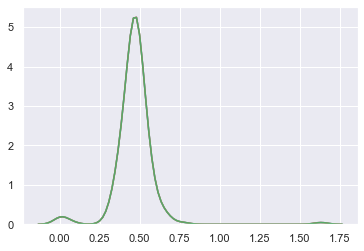

In [20]:
visualise_distr(means[0:3])

In [37]:
from scipy.stats import ks_2samp
indices = [[0,1],[0,2],[0,3],[0,4],[1,2],[1,3],[1,4],[2,3],[2,4],[3,4]]
diff = []
for distr_idx in indices:
    for idx in range(len(means[0])):
        d1 = np.random.normal(means[distr_idx[0]][idx],np.log(1+np.exp(stds[distr_idx[0]][idx])),1000)
        d2 = np.random.normal(means[distr_idx[1]][idx],np.log(1+np.exp(stds[distr_idx[1]][idx])),1000)
        diff.append(ks_2samp(d1,d2)[1])
    print(np.sum(np.array(diff)>0.95))

0
0
0
0
0
0
0
0
0
0


Ks_2sampResult(statistic=0.15700000000000003, pvalue=2.993392997894349e-11)

In [13]:
model = Linear_base_model()
model.load_state_dict(torch.load('./ckp/NN/mnist_DE_93.06.pt'))
print(model.last_layer.num_distr)

2


In [14]:
params = []
with torch.no_grad():
    for i in model.last_layer.parameters():
        params.append(i.detach().numpy())

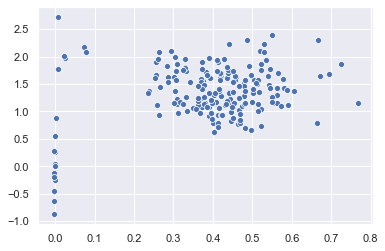

In [15]:
visulise_scatter(params[:2])

In [16]:
np.mean(np.abs(params[0] - params[1]))

0.9646317